<a href="https://colab.research.google.com/github/vkprajapati/Portfolio-Analysis/blob/main/Portfolio_assets_allocation_and_Statistical_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**



*   Perform a portfolio analysis such as calculating portfolio returns, risk and Shape ratio.
*   A portfolio is a collection of financial investments like stocks, security bonds, cash, utual funds and Exchange reade funds(ETFs).
*   Assume that client wants to invest in market, how can you allocate the assets among a selected set of securities?
* The answer depends on many factors such as client's risk tolerance, target returns and investment time span.



# Types of Assets


1.   Equities
2.   Fixed Income Securities (Bonds)
3.   Exchange Traded Funds (ETFs)




Links:
- https://www.bankofcanada.ca/rates/interest-rates/canadian-bonds/
- https://ca.finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-tre-srch
- https://investor.vanguard.com/etf/profile/performance/voo
- https://grow.acorns.com/warren-buffett-index-funds/



In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [125]:
# Read stocks data 

stocks_df = pd.read_csv('/content/drive/MyDrive/UdemyPythonAnalysis/Part 2. Financial Analysis in Python/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [126]:
# Sort data based on date
stocks_df = stocks_df.sort_values(by=['Date'])
stocks_df


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [127]:
# Use plotly express to visualize stocks data and normalize ones

def normalization(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i]= x[i]/x[i][0]
  return x


In [128]:
def interactive_plot(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [129]:
# Plot raw data
interactive_plot(stocks_df, 'Prices' )

In [130]:
notmalized_stock_df = normalization(stocks_df)

In [131]:
interactive_plot(notmalized_stock_df, 'Noramlized prices')

# Concept of asset allocation

Asset allocation is an investment strategy that is used to allocate client's assets based on their risk tolerance, target return and investment time span.
The gole of portfolio manager is to maximize returns and reduce risks.
There are many asset classes like:


*   Equities
*   Bonds(Fixed income securities)
* cash and equalivalent
* Exchange trade funds
*real estate 
*commodities




# Example
Assume Client want to invest $1M dollers


*   Start with random weights for all secureties in given data set.
*   then multiply the weight with the investing money and it will give you a portfolio worth.



## Perform Random assets allocation and calculate protfolio daily returns

In [132]:
weights = np.array(np.random.random(9))
weights

array([0.39148648, 0.82846446, 0.33641304, 0.9774754 , 0.06051636,
       0.4430776 , 0.05829094, 0.19036633, 0.54199756])

In [133]:
# Create random portfolio weights.
# weight should sum to 1

#set random seed
#np.random.seed(101)
np.random.seed()

#Create random weights for stocks and normalize it.
weights = np.array(np.random.random(9))

#Ensure that the sum of all weights are = 1
weights = weights / np.sum(weights)
weights

array([0.09024469, 0.11136151, 0.09798406, 0.15835089, 0.08881738,
       0.14856538, 0.03692955, 0.10473833, 0.16300822])

In [134]:
#normalize stock velues

df_portfolio = normalization(stocks_df)
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


In [135]:
#list the all the columns names

df_portfolio.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [136]:
# Enumarate returns the value and a counter
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000

df_portfolio



,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,90244.686519,111361.513141,97984.055441,158350.887026,8.881738e+04,148565.376880,3.692955e+04,104738.328665,163008.221642
1,2012-01-13,89906.317872,110019.446928,97821.396059,161222.873436,9.007445e+04,147421.617689,2.979202e+04,103964.818990,162201.669544
2,2012-01-17,90953.557382,110963.313522,98406.958123,159917.425068,9.171015e+04,148112.807499,3.477260e+04,104562.003463,162777.964696
3,2012-01-18,91898.002453,110697.851043,98667.207930,166183.577234,9.563784e+04,148993.261615,3.504712e+04,105282.285144,164586.090771
4,2012-01-19,91606.743551,111435.246819,98959.988962,167097.391091,9.816711e+04,148540.692235,3.498176e+04,106390.152338,165398.925008
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,659986.163129,257026.670438,97105.709090,218270.954058,1.618043e+06,103226.395869,1.941279e+06,492096.964802,418721.631025
2155,2020-08-06,683012.574409,253959.101058,97073.177865,240985.755660,1.628125e+06,103777.709590,1.947240e+06,500943.026040,421413.046121
2156,2020-08-07,666282.471602,250744.065795,97658.739929,248426.837466,1.599076e+06,102823.201539,1.899042e+06,499069.628661,421679.813007
2157,2020-08-10,675966.754018,264592.358481,98244.305247,282629.571650,1.589333e+06,104592.328385,1.854412e+06,499607.267000,422836.151180


In [137]:
# Create a column that contains the sum of all $ values in portfolio
df_portfolio['Portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Portfolio daily worth in $
0,2012-01-12,90244.686519,111361.513141,97984.055441,158350.887026,8.881738e+04,148565.376880,3.692955e+04,104738.328665,163008.221642,1.000000e+06
1,2012-01-13,89906.317872,110019.446928,97821.396059,161222.873436,9.007445e+04,147421.617689,2.979202e+04,103964.818990,162201.669544,9.924246e+05
2,2012-01-17,90953.557382,110963.313522,98406.958123,159917.425068,9.171015e+04,148112.807499,3.477260e+04,104562.003463,162777.964696,1.002177e+06
3,2012-01-18,91898.002453,110697.851043,98667.207930,166183.577234,9.563784e+04,148993.261615,3.504712e+04,105282.285144,164586.090771,1.016993e+06
4,2012-01-19,91606.743551,111435.246819,98959.988962,167097.391091,9.816711e+04,148540.692235,3.498176e+04,106390.152338,165398.925008,1.022578e+06
...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,659986.163129,257026.670438,97105.709090,218270.954058,1.618043e+06,103226.395869,1.941279e+06,492096.964802,418721.631025,5.805757e+06
2155,2020-08-06,683012.574409,253959.101058,97073.177865,240985.755660,1.628125e+06,103777.709590,1.947240e+06,500943.026040,421413.046121,5.876529e+06
2156,2020-08-07,666282.471602,250744.065795,97658.739929,248426.837466,1.599076e+06,102823.201539,1.899042e+06,499069.628661,421679.813007,5.784803e+06
2157,2020-08-10,675966.754018,264592.358481,98244.305247,282629.571650,1.589333e+06,104592.328385,1.854412e+06,499607.267000,422836.151180,5.792214e+06


In [138]:
#calculate the daily returns of portfolio
#define a new column in data frame and set itt zero

df_portfolio['Portfolio Daily % returns'] = 0.0000

for i in range(1, len(stocks_df)):
  df_portfolio['Portfolio Daily % returns'][i] = ((df_portfolio['Portfolio daily worth in $'][i] - df_portfolio['Portfolio daily worth in $'][i-1]) / df_portfolio['Portfolio daily worth in $'][i-1]) * 100

df_portfolio 

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Portfolio daily worth in $,Portfolio Daily % returns
0,2012-01-12,90244.686519,111361.513141,97984.055441,158350.887026,8.881738e+04,148565.376880,3.692955e+04,104738.328665,163008.221642,1.000000e+06,0.000000
1,2012-01-13,89906.317872,110019.446928,97821.396059,161222.873436,9.007445e+04,147421.617689,2.979202e+04,103964.818990,162201.669544,9.924246e+05,-0.757539
2,2012-01-17,90953.557382,110963.313522,98406.958123,159917.425068,9.171015e+04,148112.807499,3.477260e+04,104562.003463,162777.964696,1.002177e+06,0.982662
3,2012-01-18,91898.002453,110697.851043,98667.207930,166183.577234,9.563784e+04,148993.261615,3.504712e+04,105282.285144,164586.090771,1.016993e+06,1.478428
4,2012-01-19,91606.743551,111435.246819,98959.988962,167097.391091,9.816711e+04,148540.692235,3.498176e+04,106390.152338,165398.925008,1.022578e+06,0.549146
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,659986.163129,257026.670438,97105.709090,218270.954058,1.618043e+06,103226.395869,1.941279e+06,492096.964802,418721.631025,5.805757e+06,0.895300
2155,2020-08-06,683012.574409,253959.101058,97073.177865,240985.755660,1.628125e+06,103777.709590,1.947240e+06,500943.026040,421413.046121,5.876529e+06,1.219007
2156,2020-08-07,666282.471602,250744.065795,97658.739929,248426.837466,1.599076e+06,102823.201539,1.899042e+06,499069.628661,421679.813007,5.784803e+06,-1.560894
2157,2020-08-10,675966.754018,264592.358481,98244.305247,282629.571650,1.589333e+06,104592.328385,1.854412e+06,499607.267000,422836.151180,5.792214e+06,0.128115


# Portfolio allocation - Daily returns/Worth calculation (Function)

In [139]:
# Assume that we haave to invest $10,00000 to be invested and we will allocate this funds based on the weights of the stocks.
# Create a function that takes in the stockes price along with the weights and returns:
# 1. Daily Value of each individual security in $ over the specifiied time period.
# 2. Overall  daily worth of the portfolio
# 3. Daily return


def portfolio_allocation(df, weights):
  df_portfolio = df.copy()
  df_portfolio = normalization(df_portfolio)

  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['Portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
  df_portfolio['Portfolio Daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):
    df_portfolio['Portfolio Daily % return'][i] = ((df_portfolio['Portfolio daily worth in $'][i] - df_portfolio['Portfolio daily worth in $'][i-1]) / df_portfolio['Portfolio daily worth in $'][i-1]) * 100

  df_portfolio['Portfolio Daily % return'][0] = 0
  
  return df_portfolio 



In [140]:
new_portfolio = portfolio_allocation(stocks_df, weights)
new_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Portfolio daily worth in $,Portfolio Daily % return
0,2012-01-12,90244.686519,111361.513141,97984.055441,158350.887026,8.881738e+04,148565.376880,3.692955e+04,104738.328665,163008.221642,1.000000e+06,0.000000
1,2012-01-13,89906.317872,110019.446928,97821.396059,161222.873436,9.007445e+04,147421.617689,2.979202e+04,103964.818990,162201.669544,9.924246e+05,-0.757539
2,2012-01-17,90953.557382,110963.313522,98406.958123,159917.425068,9.171015e+04,148112.807499,3.477260e+04,104562.003463,162777.964696,1.002177e+06,0.982662
3,2012-01-18,91898.002453,110697.851043,98667.207930,166183.577234,9.563784e+04,148993.261615,3.504712e+04,105282.285144,164586.090771,1.016993e+06,1.478428
4,2012-01-19,91606.743551,111435.246819,98959.988962,167097.391091,9.816711e+04,148540.692235,3.498176e+04,106390.152338,165398.925008,1.022578e+06,0.549146
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,659986.163129,257026.670438,97105.709090,218270.954058,1.618043e+06,103226.395869,1.941279e+06,492096.964802,418721.631025,5.805757e+06,0.895300
2155,2020-08-06,683012.574409,253959.101058,97073.177865,240985.755660,1.628125e+06,103777.709590,1.947240e+06,500943.026040,421413.046121,5.876529e+06,1.219007
2156,2020-08-07,666282.471602,250744.065795,97658.739929,248426.837466,1.599076e+06,102823.201539,1.899042e+06,499069.628661,421679.813007,5.784803e+06,-1.560894
2157,2020-08-10,675966.754018,264592.358481,98244.305247,282629.571650,1.589333e+06,104592.328385,1.854412e+06,499607.267000,422836.151180,5.792214e+06,0.128115


# Perform portfolio data visualization

In [141]:
# Plot portfolio daily returns
fig = px.line( x = new_portfolio.Date, y = new_portfolio['Portfolio Daily % return'], title='Portfolio Daily % Return')
fig.show()


In [142]:
# Plot all normalized stock
interactive_plot(new_portfolio.drop(['Portfolio daily worth in $', 'Portfolio Daily % return'], axis=1), 'Portfolio Individual stocks worth in $ overtime')

In [143]:
#  print histogram of daily returns
fig = px.histogram(new_portfolio, x= 'Portfolio Daily % return')
fig.show()

In [144]:
# Plot portfolio daily returns
fig = px.line( x = new_portfolio.Date, y = new_portfolio['Portfolio daily worth in $'], title='Portfolio overall value in $')
fig.show()


# **Daily and Cummulative Returns**
---> Daily reaturn is a calculation of how much investers have gained andor lost in a day.

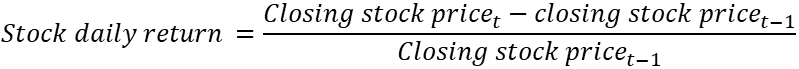 

---> Cumulative Return is a measure of the aggregate amount that stock gained or lost over a time period.

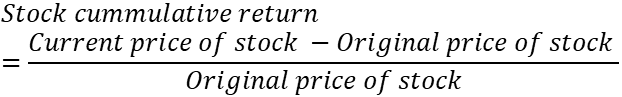

# Standard Deviation (Risk / Volatility)

The Standard deviation is a measurement of dispersion away from the mean.          
The more spread the data is, The higher the standard deviation.                  
Volatile stocks have high standard deviation and therefore standard deviation represent the risk associated with the security.
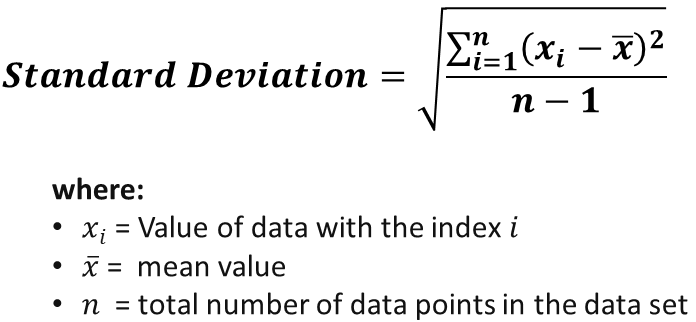

# Sharpe Ratio

Sharpe ratio is used by investers to calculate the return of an investment compared to risk.
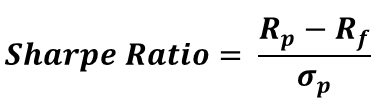

Sharpe ratio is a simpaly calculation of the average return earned in excess of the risk free rate (like bonds) per unit of risk(Volatility).                   
Note: Rf is the Risk-free rate of return. which is the return on an investment on zero risk, Meaning it's the return investors could expect for taking no risk.

As sharp ratio increases, risk-adjusted return inscreases and security becames more desired by investors


#Calculate portfolio statistical metrics ( Commulative Return, Average Daily return and Sharpe Ratio)

In [145]:
new_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Portfolio daily worth in $,Portfolio Daily % return
0,2012-01-12,90244.686519,111361.513141,97984.055441,158350.887026,8.881738e+04,148565.376880,3.692955e+04,104738.328665,163008.221642,1.000000e+06,0.000000
1,2012-01-13,89906.317872,110019.446928,97821.396059,161222.873436,9.007445e+04,147421.617689,2.979202e+04,103964.818990,162201.669544,9.924246e+05,-0.757539
2,2012-01-17,90953.557382,110963.313522,98406.958123,159917.425068,9.171015e+04,148112.807499,3.477260e+04,104562.003463,162777.964696,1.002177e+06,0.982662
3,2012-01-18,91898.002453,110697.851043,98667.207930,166183.577234,9.563784e+04,148993.261615,3.504712e+04,105282.285144,164586.090771,1.016993e+06,1.478428
4,2012-01-19,91606.743551,111435.246819,98959.988962,167097.391091,9.816711e+04,148540.692235,3.498176e+04,106390.152338,165398.925008,1.022578e+06,0.549146
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,659986.163129,257026.670438,97105.709090,218270.954058,1.618043e+06,103226.395869,1.941279e+06,492096.964802,418721.631025,5.805757e+06,0.895300
2155,2020-08-06,683012.574409,253959.101058,97073.177865,240985.755660,1.628125e+06,103777.709590,1.947240e+06,500943.026040,421413.046121,5.876529e+06,1.219007
2156,2020-08-07,666282.471602,250744.065795,97658.739929,248426.837466,1.599076e+06,102823.201539,1.899042e+06,499069.628661,421679.813007,5.784803e+06,-1.560894
2157,2020-08-10,675966.754018,264592.358481,98244.305247,282629.571650,1.589333e+06,104592.328385,1.854412e+06,499607.267000,422836.151180,5.792214e+06,0.128115


In [146]:
# Cummulative return of portfolio (Look for the last net worth of portfolio compared to it's start value)
cummulative_return = ((new_portfolio['Portfolio daily worth in $'][-1:] - new_portfolio['Portfolio daily worth in $'][0] )/ new_portfolio['Portfolio daily worth in $'][0] ) *100
print('commulative returns of the portfolio is {}%'.format(cummulative_return.values[0]))

commulative returns of the portfolio is 467.0453220853408%


In [147]:
#Calculate Standard deviation.
standard_deviation = new_portfolio['Portfolio Daily % return'].std()

print('Standard deviation of portfolio is {}'.format(standard_deviation))

Standard deviation of portfolio is 1.3624920636315256


In [148]:
 # Average Daily return of porttfolio
 print('Average daily return of portfoio is {}'.format(new_portfolio['Portfolio Daily % return'].mean()))

Average daily return of portfoio is 0.0897472077050158


In [149]:
# Sharpe Ratio
sharpe_ratio = new_portfolio['Portfolio Daily % return'].mean() / new_portfolio['Portfolio Daily % return'].std() * np.sqrt(252)
print('Sharpe Ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe Ratio of the portfolio is 1.0456521492699764
